In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Create a toy dataset -- Spiral/Swirl

3 classes:
* Red
* Blue
* Yellow

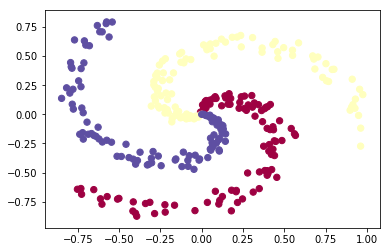

In [4]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

## Train a linear Softmax Classifier

Softmax classifier has a **linear score function** and uses the **cross-entropy loss**. 
The parameters:
* weight matrix W
* bias vector b 
for each class. 

Initialize these parameters to be random numbers first.

In [10]:
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

# compute class scores for a linear classifier
scores = np.dot(X, W) + b


scores.shape

(300, 3)

## Cross-Entropy Loss

#### Obtain probabilities first

In [14]:
num_examples = X.shape[0]
# get unnormalized probabilities
exp_scores = np.exp(scores)
# normalize them for each example
probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

# query for the log probabilities assigned to the correct classes in each example
correct_logprobs = -np.log(probs[range(num_examples),y])

# The array correct_logprobs is a 1D array of just the probabilities assigned to the correct classes for each example
# The full loss is then the average of these log probabilities and the regularization loss

In [17]:
#Train a Linear Classifier

# initialize parameters randomly
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in range(200):
  
  # evaluate class scores, [N x K]
  scores = np.dot(X, W) + b 
  
  # compute the class probabilities
  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
  # compute the loss: average cross-entropy loss and regularization
  correct_logprobs = -np.log(probs[range(num_examples),y])
  data_loss = np.sum(correct_logprobs)/num_examples
  reg_loss = 0.5*reg*np.sum(W*W)
  loss = data_loss + reg_loss
  if i % 10 == 0:
    print("iteration %d: loss %f" % (i, loss))
  
  # compute the gradient on scores
  dscores = probs
  dscores[range(num_examples),y] -= 1
  dscores /= num_examples
  
  # backpropate the gradient to the parameters (W,b)
  dW = np.dot(X.T, dscores)
  db = np.sum(dscores, axis=0, keepdims=True)
  
  dW += reg*W # regularization gradient
  
  # perform a parameter update
  W += -step_size * dW
  b += -step_size * db


iteration 0: loss 1.100351
iteration 10: loss 0.899706
iteration 20: loss 0.824452
iteration 30: loss 0.789674
iteration 40: loss 0.771197
iteration 50: loss 0.760441
iteration 60: loss 0.753775
iteration 70: loss 0.749453
iteration 80: loss 0.746557
iteration 90: loss 0.744565
iteration 100: loss 0.743168
iteration 110: loss 0.742172
iteration 120: loss 0.741453
iteration 130: loss 0.740929
iteration 140: loss 0.740543
iteration 150: loss 0.740257
iteration 160: loss 0.740043
iteration 170: loss 0.739884
iteration 180: loss 0.739763
iteration 190: loss 0.739672


### Evaluate the accuracy of the training set

In [20]:
# evaluate training set accuracy
scores = np.dot(X, W) + b
predicted_class = np.argmax(scores, axis=1)
#print(training accuracy: %.2f' % (np.mean(predicted_class == y)))
print(np.mean(predicted_class == y))

0.53


## Train a Neural Network

Steps undertaken:

1. We will now need two sets of weights and biases (for the first and second layers)
    * size of the hidden layer (H) is 100
    * the only change from before is one extra line of code, where we first compute the hidden layer representation and then the scores based on this hidden layer.
2. The forward pass to compute scores
    * 2 layers in the NN
    * use ReLu activation function -- we’ve added a non-linearity with ReLU that thresholds the activations on the hidden layer at zero
3. Backpropagate all layers

The code looks very similar to Softmax

In [24]:
# initialize parameters randomly
h = 100 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in range(10000):
  
  # evaluate class scores, [N x K]
  hidden_layer = np.maximum(0, np.dot(X, W) + b) # note, ReLU activation
  scores = np.dot(hidden_layer, W2) + b2
  
  # compute the class probabilities
  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
  # compute the loss: average cross-entropy loss and regularization
  correct_logprobs = -np.log(probs[range(num_examples),y])
  data_loss = np.sum(correct_logprobs)/num_examples
  reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
  loss = data_loss + reg_loss
  if i % 1000 == 0:
    print("iteration %d: loss %f" % (i, loss))
  
  # compute the gradient on scores
  dscores = probs
  dscores[range(num_examples),y] -= 1
  dscores /= num_examples
  
  # backpropate the gradient to the parameters
  # first backprop into parameters W2 and b2
  dW2 = np.dot(hidden_layer.T, dscores)
  db2 = np.sum(dscores, axis=0, keepdims=True)
  # next backprop into hidden layer
  dhidden = np.dot(dscores, W2.T)
  # backprop the ReLU non-linearity
  dhidden[hidden_layer <= 0] = 0
  # finally into W,b
  dW = np.dot(X.T, dhidden)
  db = np.sum(dhidden, axis=0, keepdims=True)
  
  # add regularization gradient contribution
  dW2 += reg * W2
  dW += reg * W
  
  # perform a parameter update
  W += -step_size * dW
  b += -step_size * db
  W2 += -step_size * dW2
  b2 += -step_size * db2

iteration 0: loss 1.098580
iteration 1000: loss 0.283012
iteration 2000: loss 0.252242
iteration 3000: loss 0.239074
iteration 4000: loss 0.236727
iteration 5000: loss 0.235962
iteration 6000: loss 0.235671
iteration 7000: loss 0.235631
iteration 8000: loss 0.235616
iteration 9000: loss 0.235609


### Evaluate the accuracy of the training set

In [26]:
# evaluate training set accuracy
hidden_layer = np.maximum(0, np.dot(X, W) + b)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print(np.mean(predicted_class == y))

0.9833333333333333


## Results -- Softmax vs NN

### Softmax

(-1.8754059003858714, 1.7845940996141318)

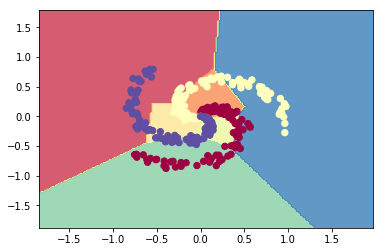

In [27]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#fig.savefig('spiral_linear.png')

### 2-layer Neural Network

(-1.8754059003858714, 1.7845940996141318)

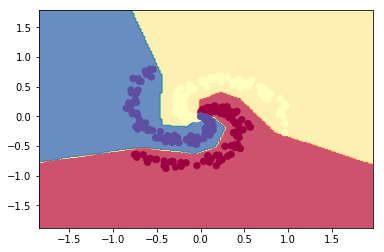

In [28]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b), W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#fig.savefig('spiral_net.png')

Notes adapted from http://cs231n.github.io